# Exempel på analys av jämställdhet

### Append dependencies and import functions

In [11]:
#!pip install pyscbwrapper # Ta bort kommentar vid första körning
#!pip install plotly # Ta bort kommentar vid första körning

from pyscbwrapper import SCB
import pandas as pd
from pandas import Series
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def get_col_names(pdColsData):
    tableContent = 'tabellinnehåll'
    keyNames = list(pdColsData.keys())
    keyNames.remove(tableContent)
    valNames = pdColsData[tableContent]
    return keyNames + valNames


def replace_value(poDf, plColNames, plColInfo, pnNameIdx, psValue, pnEntryIdx):
    poDf[plColNames[pnNameIdx]].replace(
        psValue,
        plColInfo[plColNames[pnNameIdx]][pnEntryIdx],
        inplace=True)


def replace_values(poDf, plColNames, plColInfo, plOldValues):
    for nRowIdx, lNames in enumerate(plOldValues):
        for nIdx, sNewVal in enumerate(lNames):
            replace_value(poDf, plColNames, plColInfo, nRowIdx, sNewVal, nIdx)


def plot_graph(poDataFrame, plElectionTypes, psOrigin, psPlotValue):
    for sElectionType in plElectionTypes:
        oSeries = oDataFrame.loc[
            (oDataFrame['val'] == sElectionType) &
            (oDataFrame['inrikes/utrikes född'] == sOrigin),
            ['kön', 'år', sPlotValue]]

        oFig = px.histogram(oSeries, x="år", y=sPlotValue, color='kön')
        oFig.update_layout(
            title=f"{sPlotValue} för {sElectionType} - {sOrigin}",
            title_x=0.5,
            width=800)
        oFig.show()


# move the cursor to the correct table
oCursor = SCB('sv', 'LE', 'LE0201', 'LE0201Makt', 'LE0201Tema12b')
oInfo = oCursor.info()
print(oInfo['title'])
print(oInfo['variables'][0]['text'] + ': ' +
      ', '.join(oInfo['variables'][0]['values']) +
      ' = ' +
      ', '.join(oInfo['variables'][0]['valueTexts']))
print(oInfo['variables'][1]['text'] + ': ' +
      ', '.join(oInfo['variables'][1]['values']) +
      ' = ' +
      ', '.join(oInfo['variables'][1]['valueTexts']))
print(oInfo['variables'][2]['text'] + ': ' +
      ', '.join(oInfo['variables'][2]['values']) +
      ' = ' +
      ', '.join(oInfo['variables'][2]['valueTexts']))
print(oInfo['variables'][4]['text'] + ': ' +
      ', '.join(oInfo['variables'][4]['values']))
print('*' * 150)

lColInfo = oCursor.get_variables()
lColNames = get_col_names(lColInfo)

oData = oCursor.get_data()
lData = list(map(lambda x: x['key'] + x['values'], oData['data']))

oDataFrame = pd.DataFrame(lData, columns=lColNames)

# correct values in data with those values from col info (variables)
lOldValues = [['R', 'L', 'K'], ['13', '23'], ['2', '1']]
replace_values(oDataFrame, lColNames, lColInfo, lOldValues)

print("Första 10 rader i tabellen:")
oDataFrame.head(10)

Nominerade och valda till allmänna val. Antal och könsfördelning (procent) efter val, inrikes/utrikes född, kön, tabellinnehåll och år
val: R, L, K = Riksdag, Regionfullmäktige, Kommunfullmäktige
inrikes/utrikes född: 13, 23 = inrikes födda, utrikes födda
kön: 2, 1 = kvinnor, män
år: 2002, 2006, 2010, 2014, 2018, 2022
******************************************************************************************************************************************************
Första 10 rader i tabellen:


,val,inrikes/utrikes född,kön,år,Antal nominerade,"Könsfördelning, nominerade, procent",Antal valda,"Könsfördelning, valda, procent"
0,Riksdag,inrikes födda,kvinnor,2002,1962,41,147,45
1,Riksdag,inrikes födda,kvinnor,2006,2189,43,157,47
2,Riksdag,inrikes födda,kvinnor,2010,2236,44,142,44
3,Riksdag,inrikes födda,kvinnor,2014,2372,45,142,44
4,Riksdag,inrikes födda,kvinnor,2018,2411,44,150,47
5,Riksdag,inrikes födda,kvinnor,2022,2387,44,152,47
6,Riksdag,inrikes födda,män,2002,2772,59,183,55
7,Riksdag,inrikes födda,män,2006,2948,57,175,53
8,Riksdag,inrikes födda,män,2010,2829,56,179,56
9,Riksdag,inrikes födda,män,2014,2885,55,178,56


## 1. Inrikes födda - Nominerade - absoluta värde

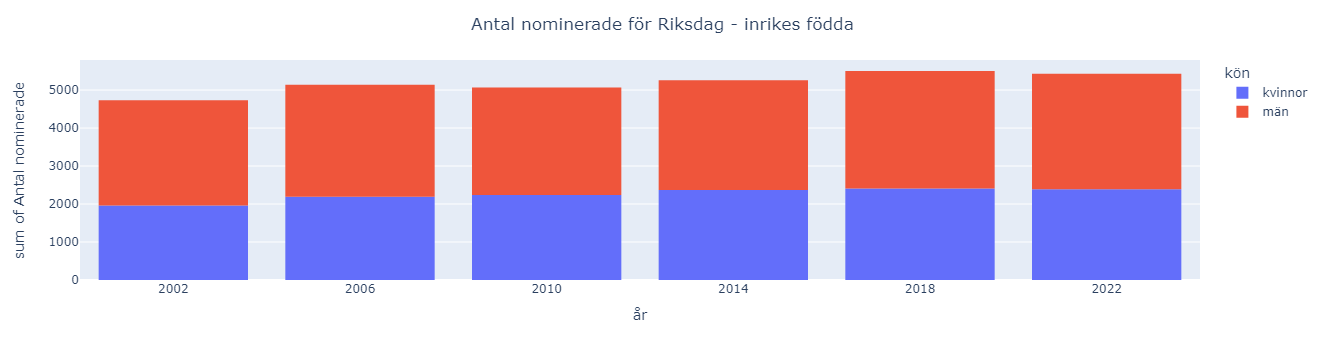

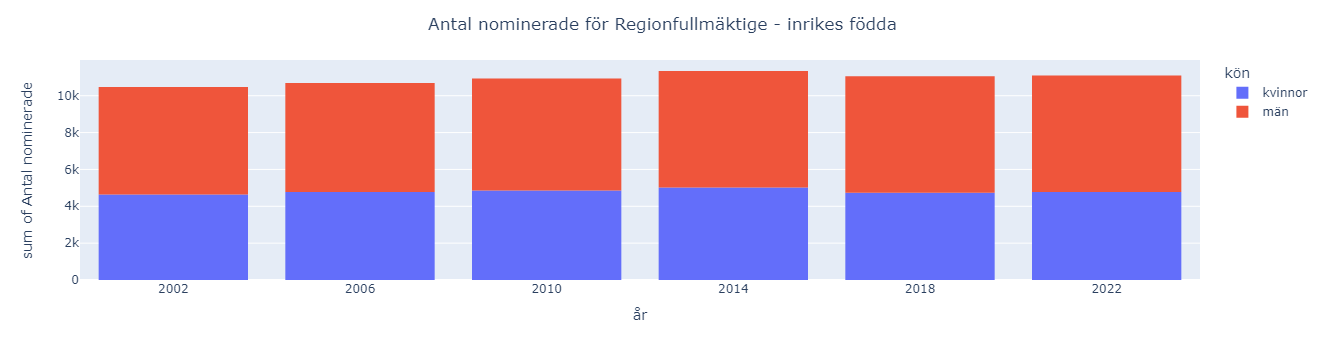

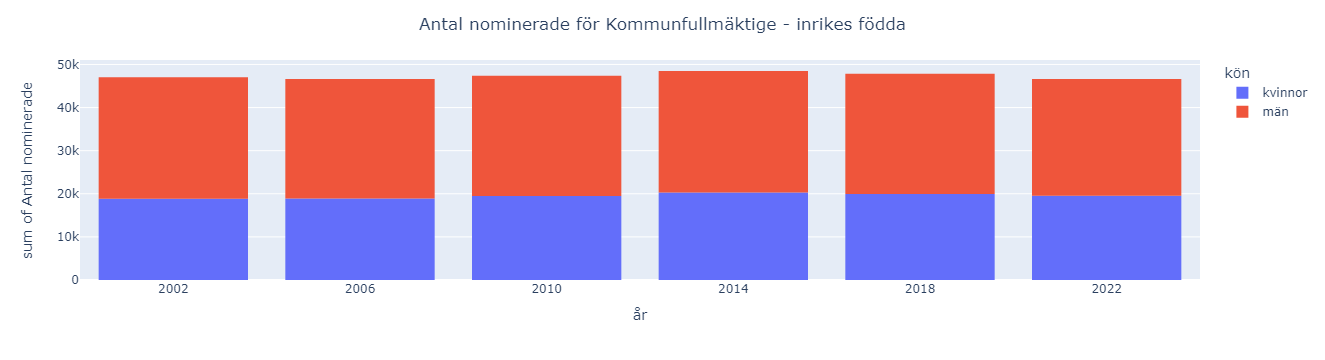

In [13]:
# data configuration
sOrigin = 'inrikes födda'
sPlotValue = 'Antal nominerade'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)

## 2. Inrikes födda - Nominerade - procent

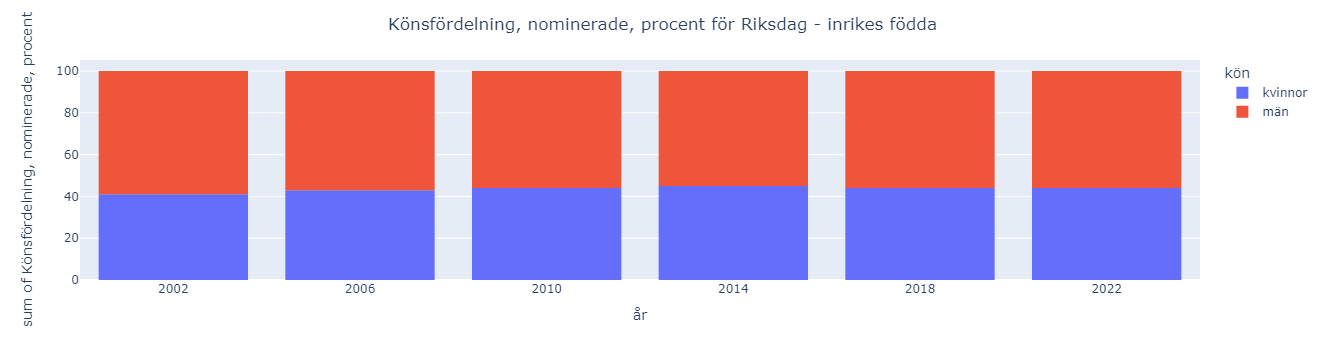

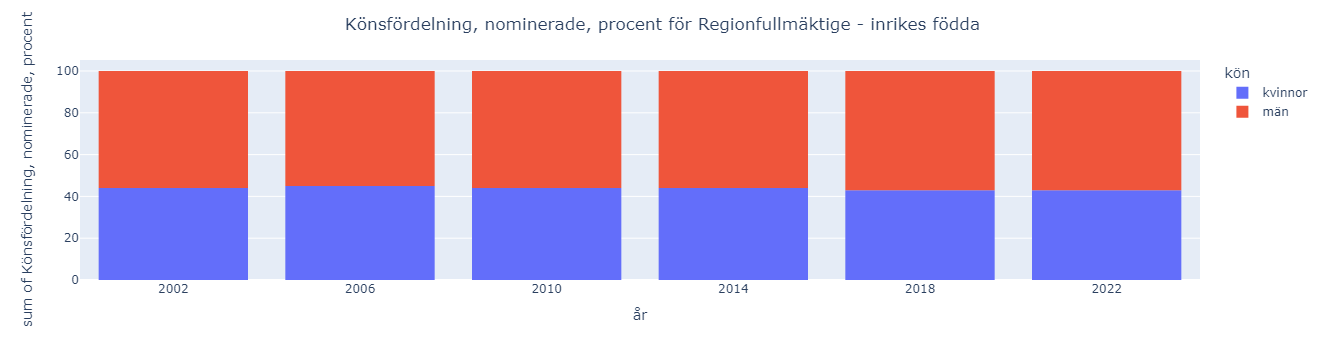

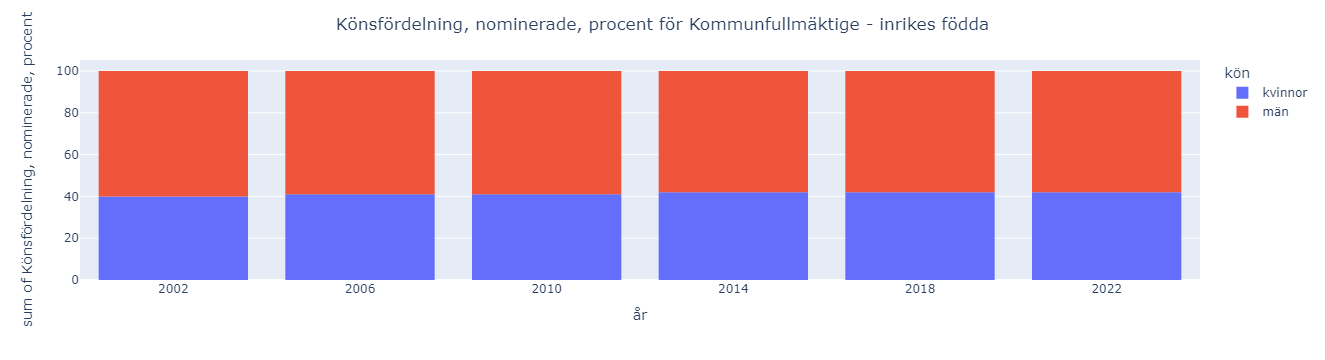

In [14]:
# data configuration
sOrigin = 'inrikes födda'
sPlotValue = 'Könsfördelning, nominerade, procent'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)

## 3. Utrikes födda - Nominerade - absoluta värde

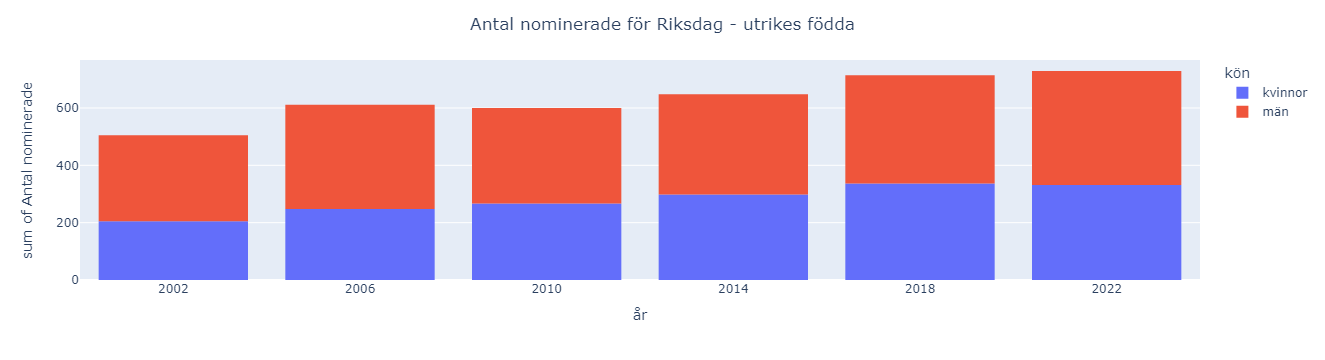

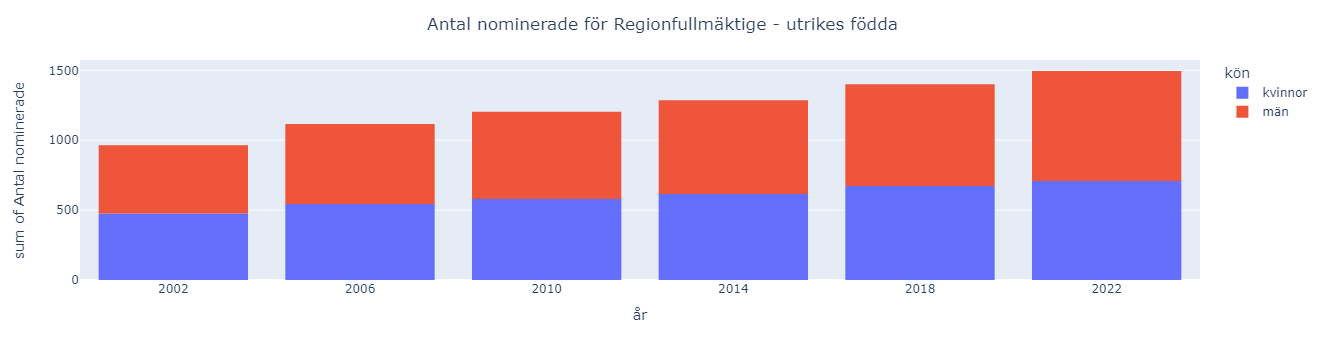

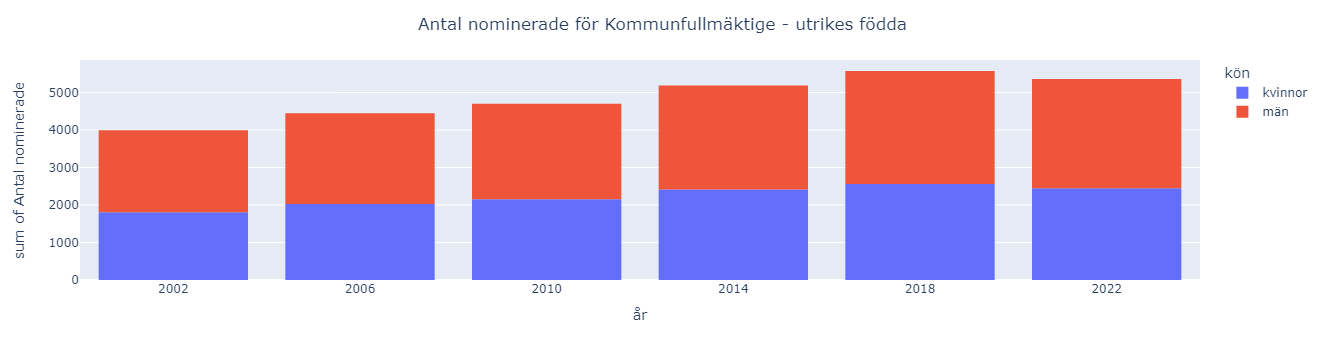

In [15]:
# data configuration
sOrigin = 'utrikes födda'
sPlotValue = 'Antal nominerade'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)

## 4. Utrikes födda - Nominerade - procent

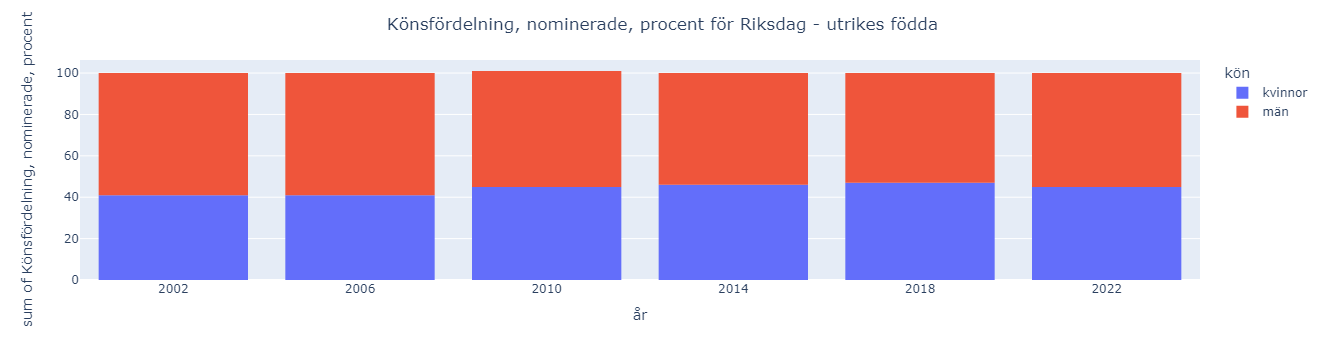

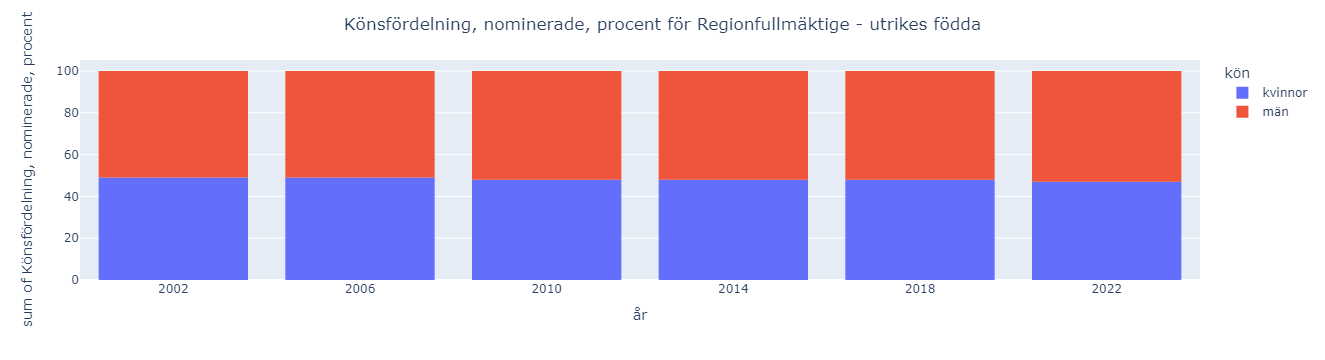

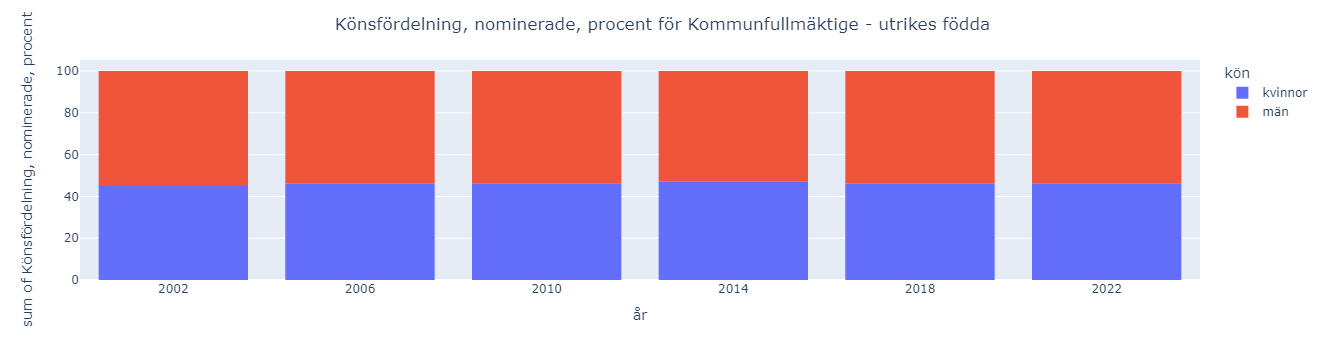

In [16]:
# data configuration
sOrigin = 'utrikes födda'
sPlotValue = 'Könsfördelning, nominerade, procent'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)

## 5. Inrikes födda - Valda - absoluta värde

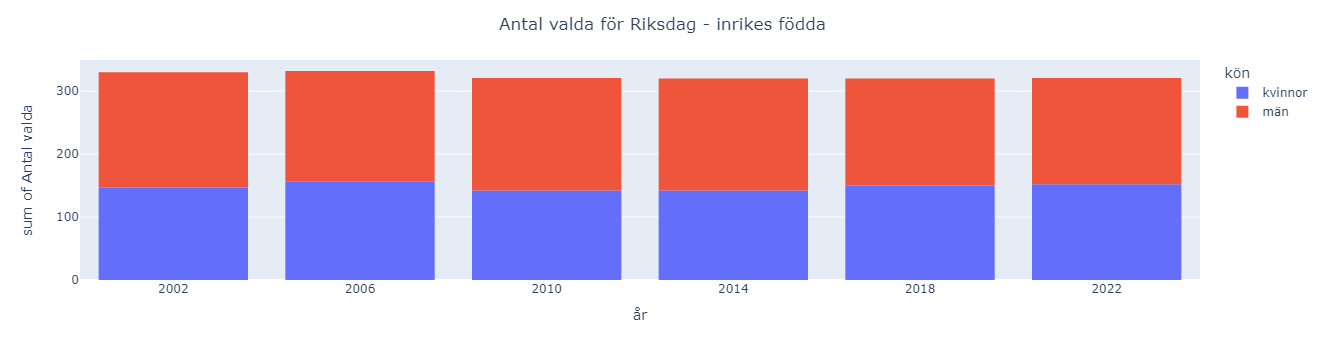

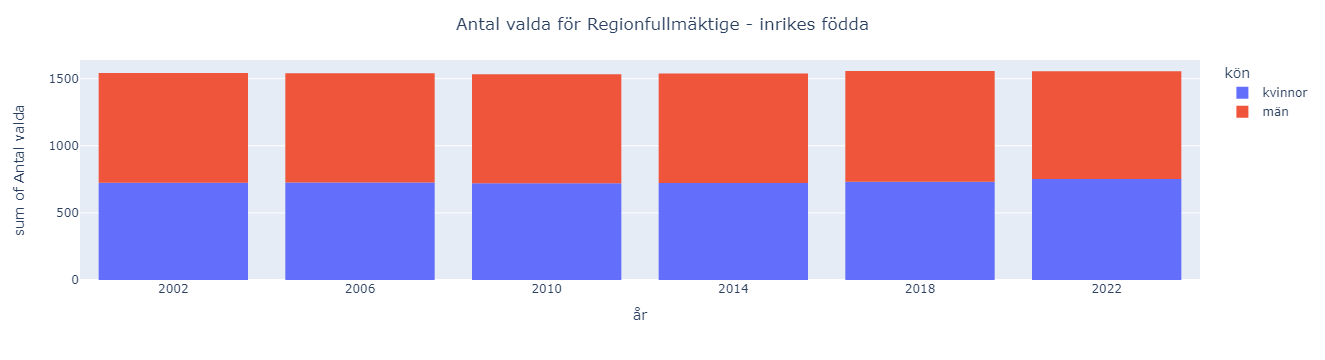

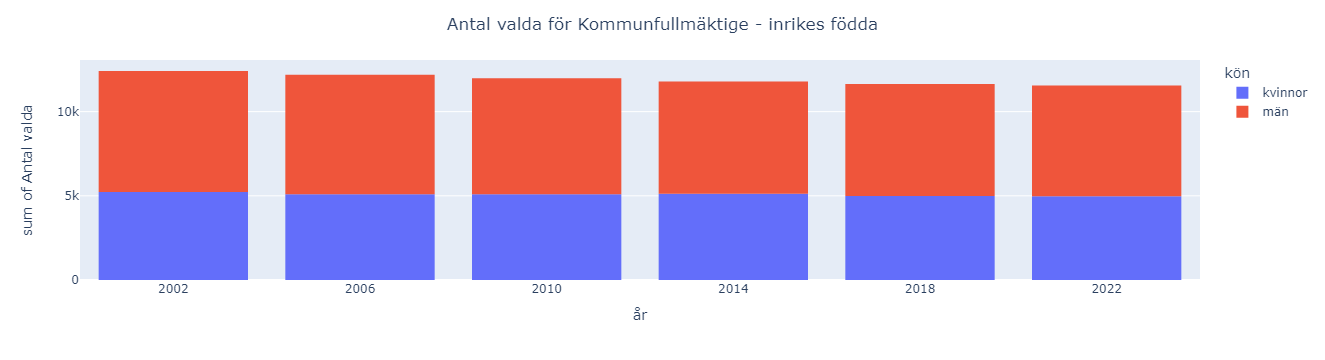

In [17]:
# data configuration
sOrigin = 'inrikes födda'
sPlotValue = 'Antal valda'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)

## 6. Inrikes födda - Valda - procent

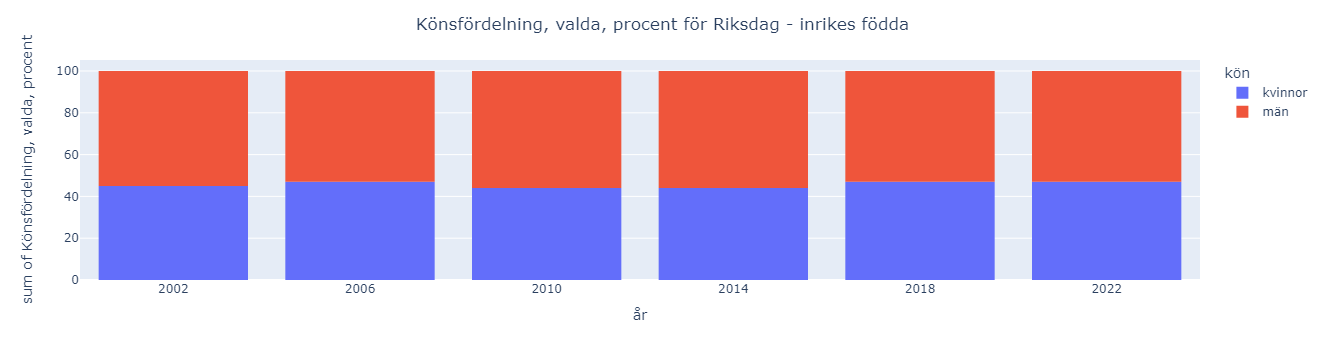

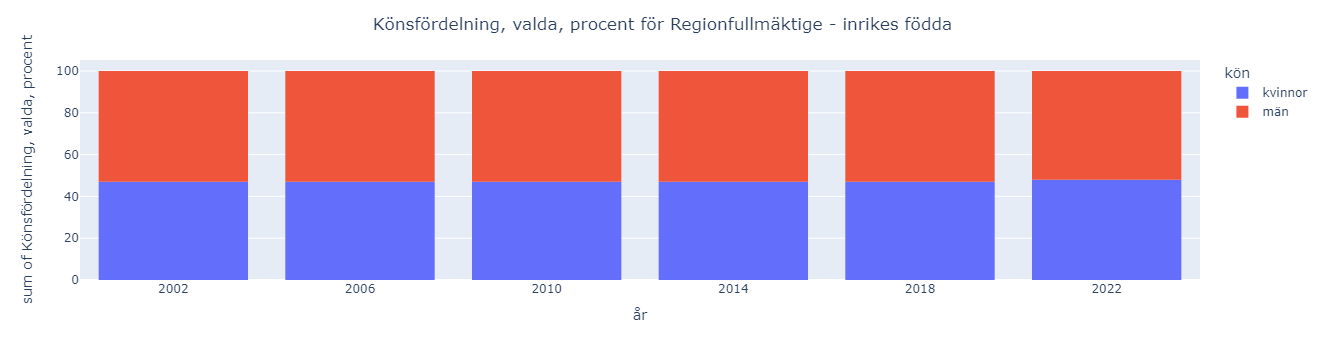

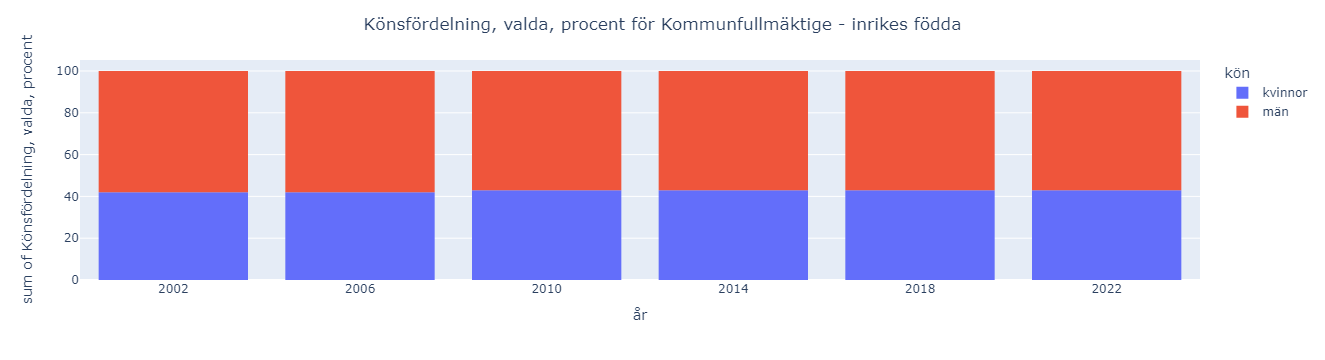

In [18]:
# data configuration
sOrigin = 'inrikes födda'
sPlotValue = 'Könsfördelning, valda, procent'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)

## 7. Utrikes födda - Valda - absoluta värde

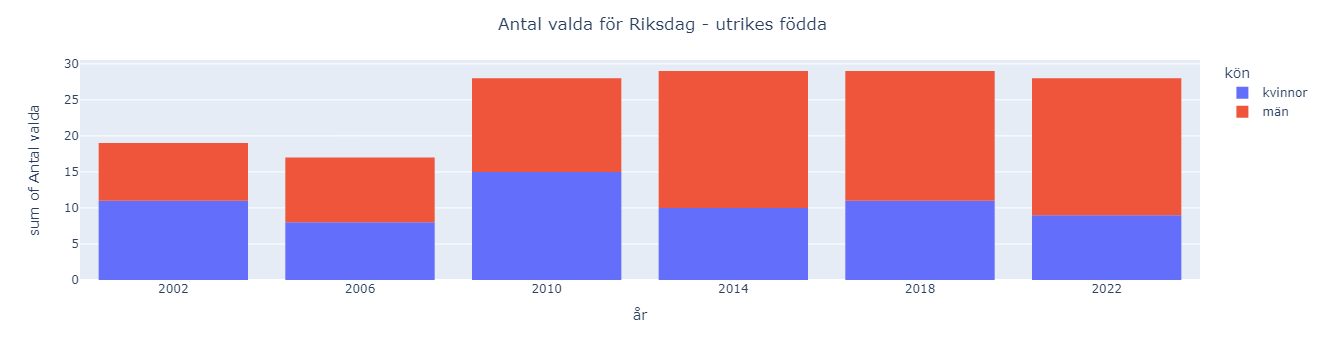

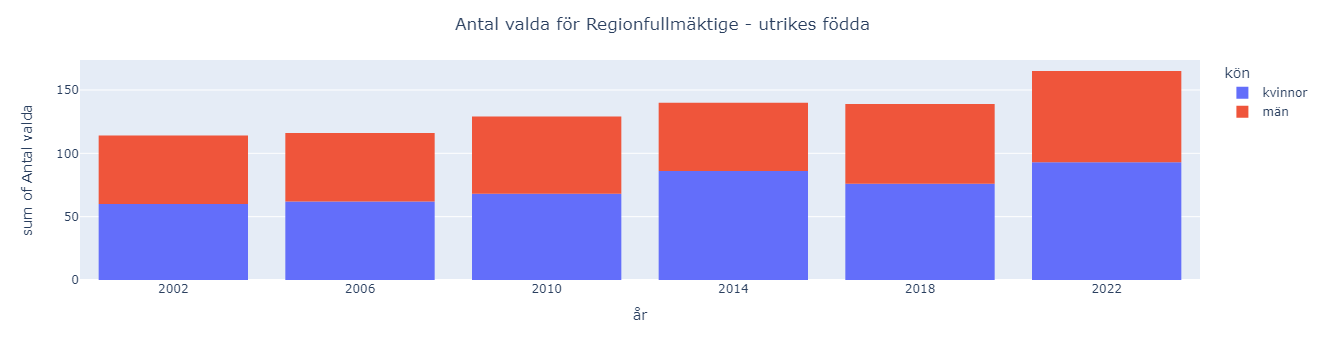

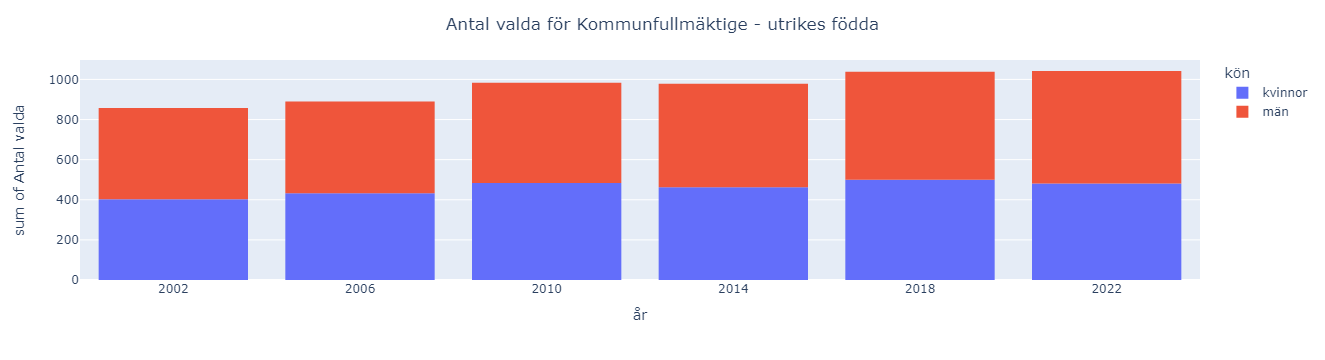

In [19]:
# data configuration
sOrigin = 'utrikes födda'
sPlotValue = 'Antal valda'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)

## 8. Utrikes födda - Valda - procent

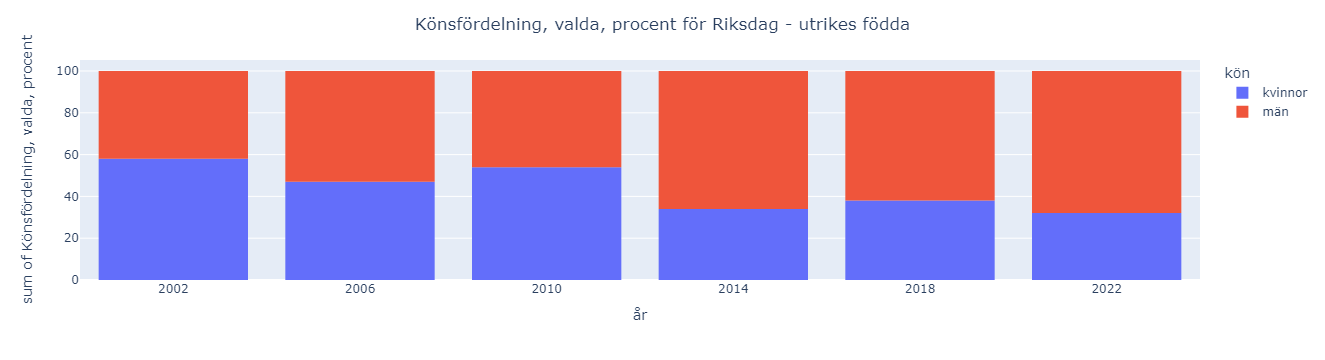

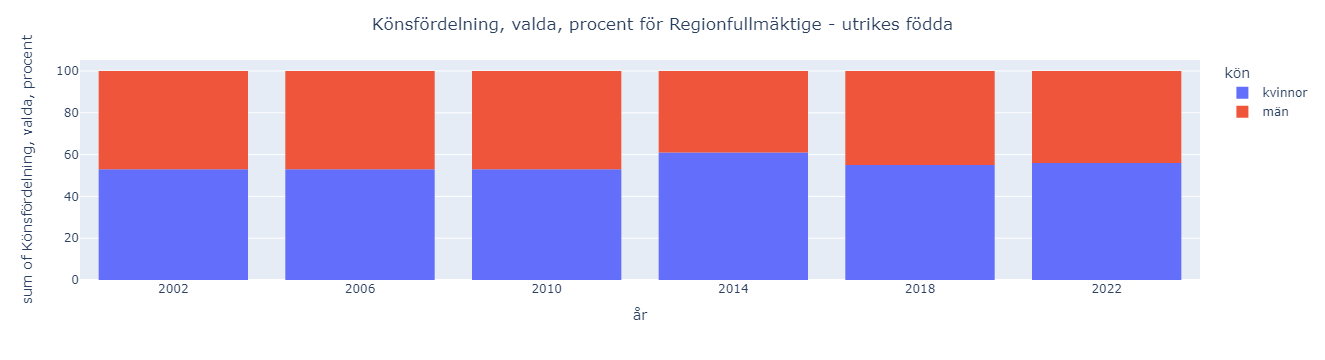

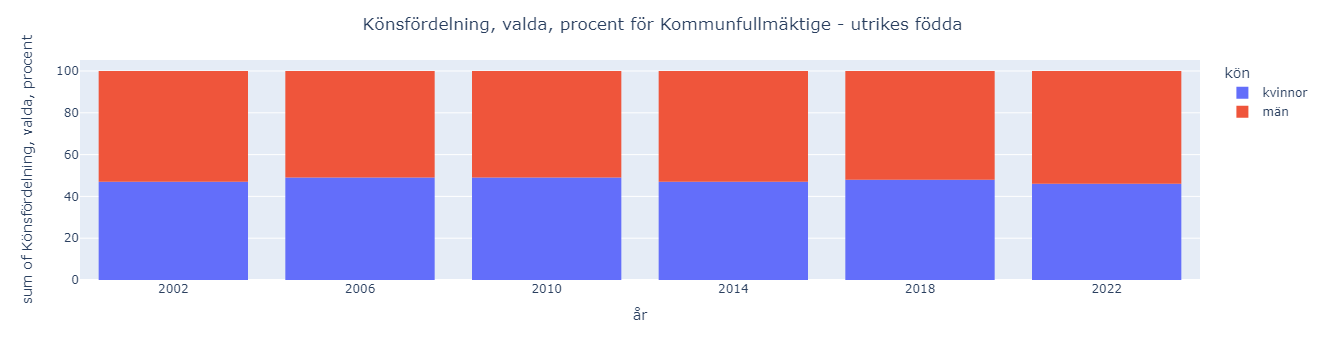

In [20]:
# data configuration
sOrigin = 'utrikes födda'
sPlotValue = 'Könsfördelning, valda, procent'
lElectionTypes = lColInfo[lColNames[0]]  # col 0 = valtyp

plot_graph(oDataFrame, lElectionTypes, sOrigin, sPlotValue)